### My process explained in simple terms-
I filtered out reviews for the major chain hotels from the Yelp Open Dataset in six priority US cities. After clearing duplicate and empty reviews, we engineered features for review duration or length, complaints keywords, and other demographic-related terms. I flagged reviews that mentioned bias (for example, race, gender, age) and taped them against comments like rudeness, refusal, or unfair treatment. We made our analysis not simply show quantitative measures in a visual manner (ratings, complaint rates, co-occurrence matrices) but combined them with certain qualitative review samples able to reveal systemic signals of bias, unfairness, or breach of reputation.

In [1]:
import os
import sys

src_path = r"D:\SEM 4\CS516\Yelp Fairness Review\scripts"
if src_path not in sys.path:
    sys.path.append(src_path)
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from preprocessing import get_chain

In [2]:
df = pd.read_csv('../Yelp-JSON/yelp_dataset/new_cities_cleaned.csv')
print(df.shape)
df.head()

(22121, 35)


,review_id,user_id,business_id,stars_review,useful,funny,cool,text,date,name,...,is_marriott,is_hilton,is_hyatt,is_sheraton,is_westin,is_doubletree,is_holiday_inn,is_hotel,is_spa,is_restaurant
0,6ua_RuwuE78l3t51BhxE9Q,USywezFPwIHeg7hmSWuvQg,SEFujmfGZI08JWRyhIpYeQ,1.0,0,0,0,please don't waste your time making a reservat...,2021-07-16 13:20:09,Embassy Suites by Hilton Philadelphia Airport,...,False,True,False,False,False,False,False,True,False,False
1,6fSJNrKaxns85umEKEqgHw,ju-aM3uOhrh7q2hip7bPOg,QMHd6Z2djm_SBLzGhLvFqw,4.0,0,0,0,in town for a college football game. picked th...,2015-11-01 17:25:02,Courtyard by Marriott Philadelphia South at Th...,...,True,False,False,False,False,False,False,True,True,False
2,3hdr-kc_B9cPjR9SDDOPBg,cvpvJV6owKXR1RarDGM1HA,jMqEQYBIztLtcvnTujfHUA,5.0,3,0,1,i stay at this hotel during my occasional visi...,2021-04-22 12:06:29,Hyatt Centric Center City Philadelphia,...,False,False,True,False,False,False,False,True,True,False
3,Lj5oHi3GaU68rr0hFsUIAg,OY32TwbyMP1z6MIyirm0Yw,JKR09pJneafnwpUg0FNEzw,1.0,0,0,0,yet another hotel review from the road warrior...,2009-04-01 21:24:34,Hilton Garden Inn Philadelphia Center City,...,False,True,False,False,False,False,False,True,True,True
4,1CuaSJaooB8VLAp2CG2I9A,BQLc7jSHfPXDvleNFJ6lyg,d9T1Jgf4N2vY3dcMlnCgeA,3.0,0,0,0,"i am a big marriott fan. very nice staff, ever...",2013-05-10 11:30:27,Philadelphia Airport Marriott,...,True,False,False,False,False,False,False,True,True,False


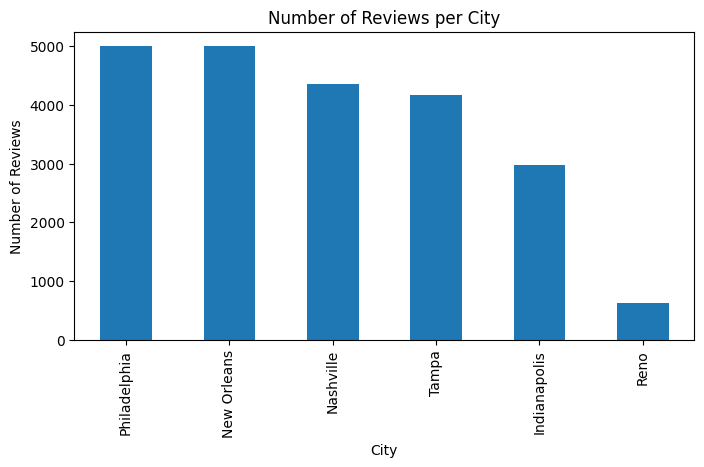

In [3]:
# Distribution by city
city_counts = df['city'].value_counts()
city_counts.plot(kind='bar', figsize=(8,4), title='Number of Reviews per City')
plt.xlabel('City')
plt.ylabel('Number of Reviews')
plt.show()

## Insight 1 

New Orleans stands out for both the longest and most detailed reviews across all star ratings, especially among lower ratings. In contrast, Reno's reviews are shorter and its ratings are higher. So that's evidence for this: guests in New Orleans are most likely to put those experiences into words-they're most likely to do so when they are not satisfied-with guests in better-rated cities like Reno rendered shorter, simpler feedback. One way negative reviews might be seen as having a higher number of reviewers, understand complex or ongoing problems basis, where reviewers feel that it warrants justification or caution to their peers.

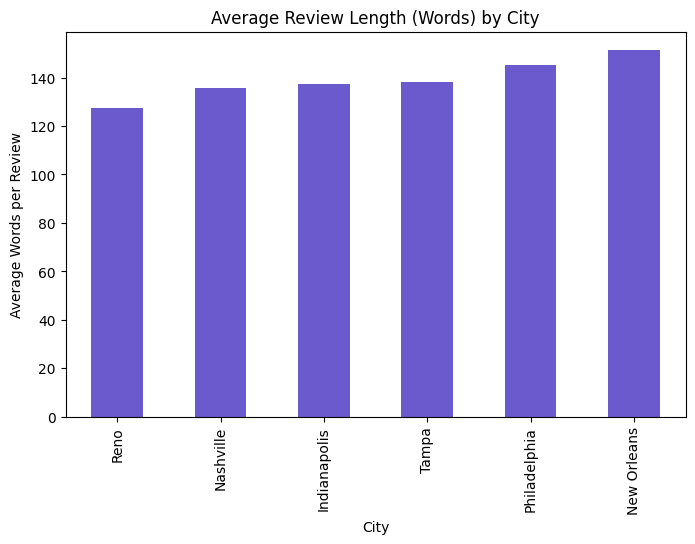

In [4]:
review_length_by_city = df.groupby('city')['text_length'].mean().sort_values()
review_length_by_city.plot(kind='bar', figsize=(8,5), color='slateblue')
plt.title('Average Review Length (Words) by City')
plt.ylabel('Average Words per Review')
plt.xlabel('City')
plt.show()


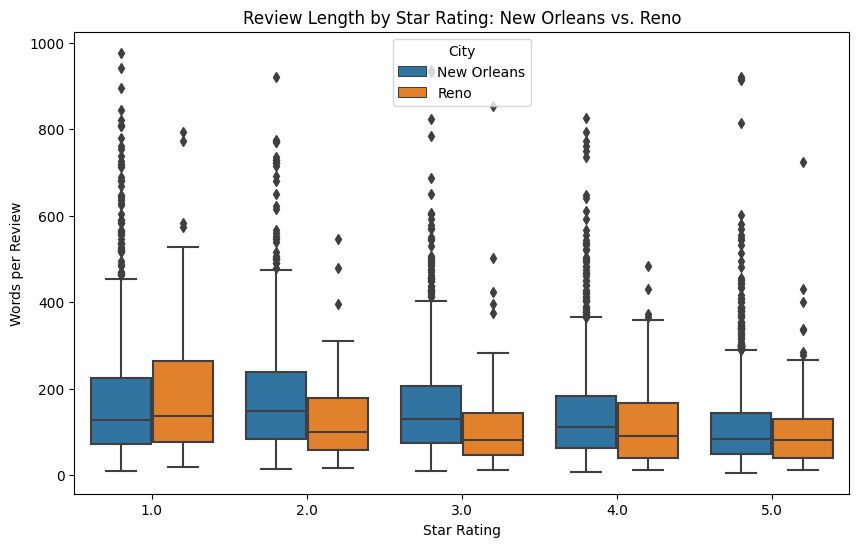

In [5]:
# Only New Orleans and Reno for comparison
subset = df[df['city'].isin(['New Orleans', 'Reno'])]
plt.figure(figsize=(10,6))
sns.boxplot(x='stars_review', y='text_length', hue='city', data=subset)
plt.title('Review Length by Star Rating: New Orleans vs. Reno')
plt.xlabel('Star Rating')
plt.ylabel('Words per Review')
plt.legend(title='City')
plt.show()


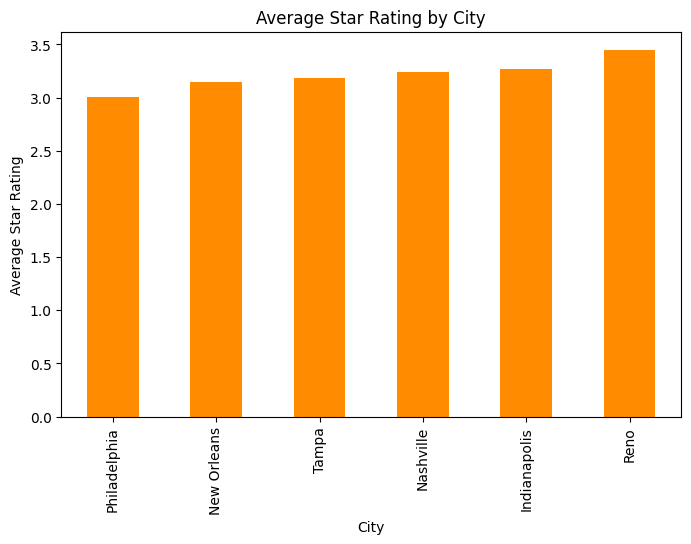

In [6]:
city_avg = df.groupby('city')['stars_review'].mean().sort_values()
city_avg.plot(kind='bar', figsize=(8,5), color='darkorange')
plt.title('Average Star Rating by City')
plt.ylabel('Average Star Rating')
plt.xlabel('City')
plt.show()


c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sanjn\.virtualenvs\signal-protocol-implementation

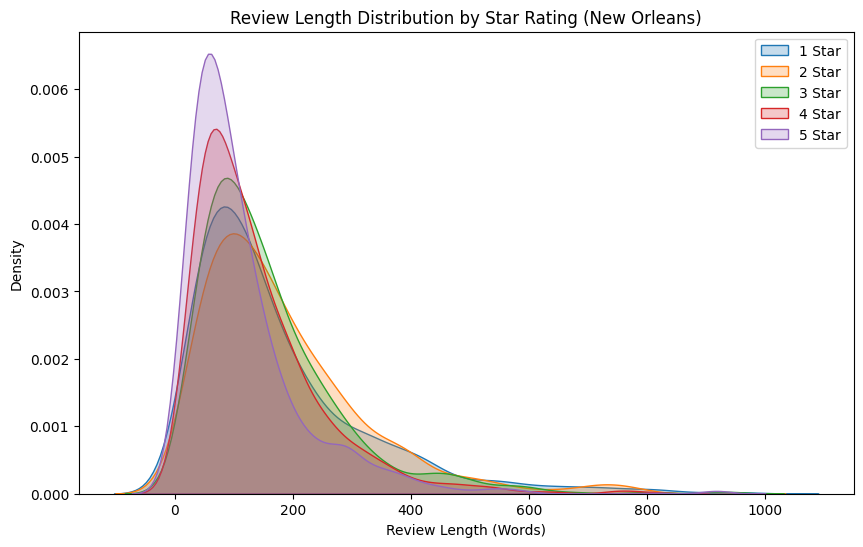

In [7]:
plt.figure(figsize=(10,6))
for rating in sorted(df['stars_review'].unique()):
    sns.kdeplot(df[(df['city']=='New Orleans') & (df['stars_review']==rating)]['text_length'],
                label=f'{int(rating)} Star', fill=True)
plt.title('Review Length Distribution by Star Rating (New Orleans)')
plt.xlabel('Review Length (Words)')
plt.legend()
plt.show()


## Insight 2
Extreme spikes can be seen in the number of months denoting the word "ruled" by particular outlier hotels. Some months report every review as "rudeness." This heralds not only the permanence of these fair or unjustified guests' experiences at these sites but also their timestamps of heightened concentration likely to be connected to management, staffing, or event-driven factors. The implication, then, is that such hotspots shall have a great potential for improving fairness and reputation when intervening during peak months. 

In [8]:
# Create complaint keyword columns
keywords = ['access', 'disabled', 'unfair', 'refused', 'service animal', 'rude']
for kw in keywords:
    df[f'has_{kw}'] = df['text'].str.contains(kw, case=False, na=False)


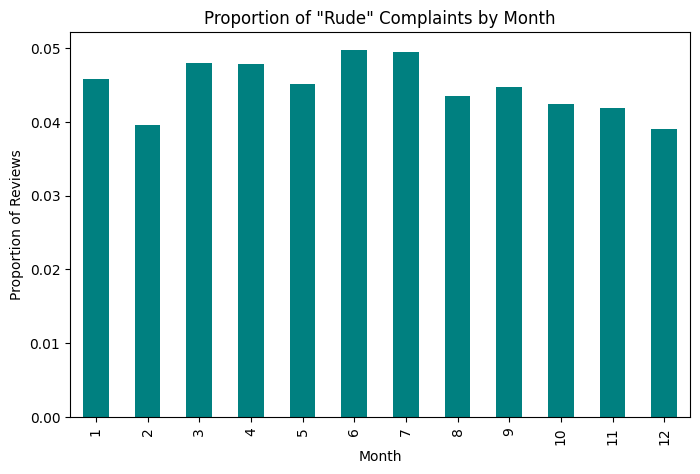

In [9]:
monthly_rude = df.groupby('review_month')['has_rude'].mean()
import matplotlib.pyplot as plt
monthly_rude.plot(kind='bar', figsize=(8,5), color='teal')
plt.title('Proportion of "Rude" Complaints by Month')
plt.ylabel('Proportion of Reviews')
plt.xlabel('Month')
plt.show()

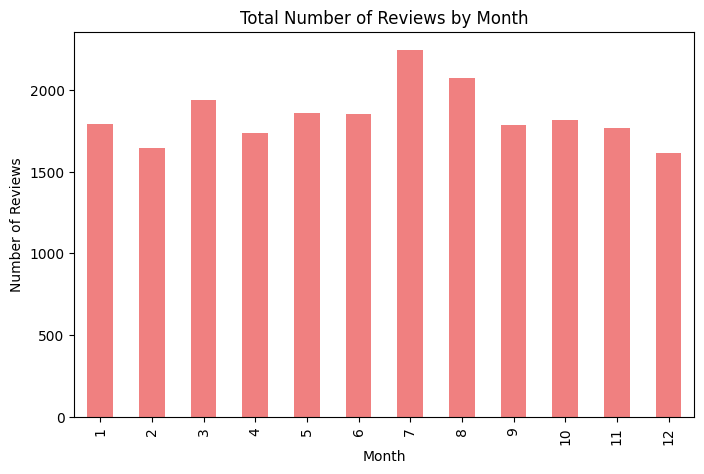

In [10]:
monthly_counts = df['review_month'].value_counts().sort_index()
monthly_counts.plot(kind='bar', figsize=(8,5), color='lightcoral')
plt.title('Total Number of Reviews by Month')
plt.ylabel('Number of Reviews')
plt.xlabel('Month')
plt.show()


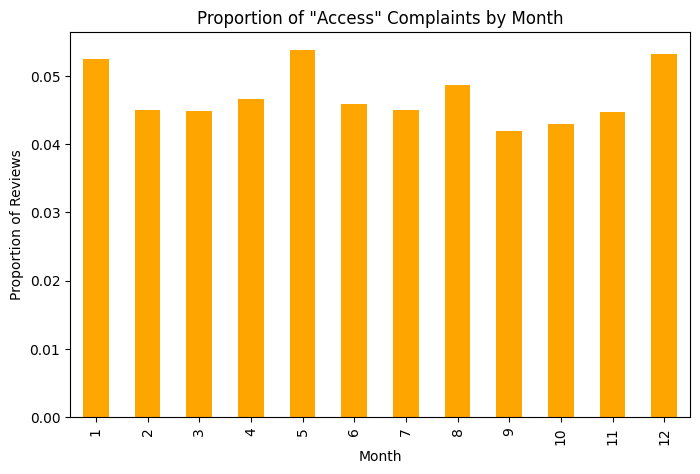

In [11]:
monthly_access = df.groupby('review_month')['has_access'].mean()
monthly_access.plot(kind='bar', figsize=(8,5), color='orange')
plt.title('Proportion of "Access" Complaints by Month')
plt.ylabel('Proportion of Reviews')
plt.xlabel('Month')
plt.show()


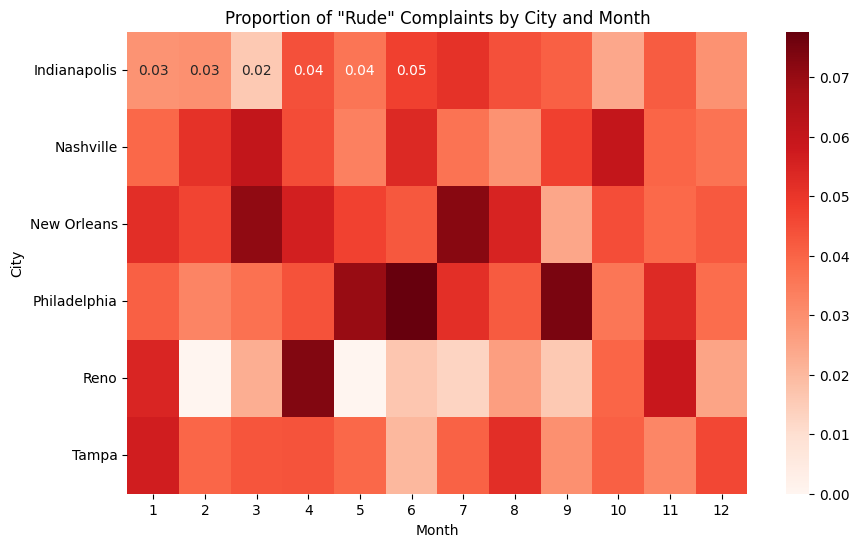

In [25]:

heatmap_data = df.pivot_table(values='has_rude', index='city', columns='review_month', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='Reds')
plt.title('Proportion of "Rude" Complaints by City and Month')
plt.ylabel('City')
plt.xlabel('Month')
plt.show()


In [13]:
# Calculate the complaint rate per hotel
hotel_rude = df.groupby(['business_id', 'name'])['has_rude'].mean().sort_values(ascending=False).head(5)
print(hotel_rude)


business_id             name                                                           
RZ1gi_Xa93bbx1y1tWIxMQ  Courtyard Marriott                                                 0.285714
3-69Zp0UWQafow9ilWDjvA  Holiday Inn Express New - Orleans Downtown                         0.244898
5-ZJE7qEtgGzypWNs9ausA  Holiday Inn Indianapolis Downtown                                  0.214286
WVK43TKUTEHjIVlF25cYLw  SpringHill Suites Marriott Nashville Downtown/Convention Center    0.200000
qm4CUb96KIa2Qv7w6U_ZYQ  Holiday Inn Express & Suites Indianapolis W - Airport Area         0.193548
Name: has_rude, dtype: float64


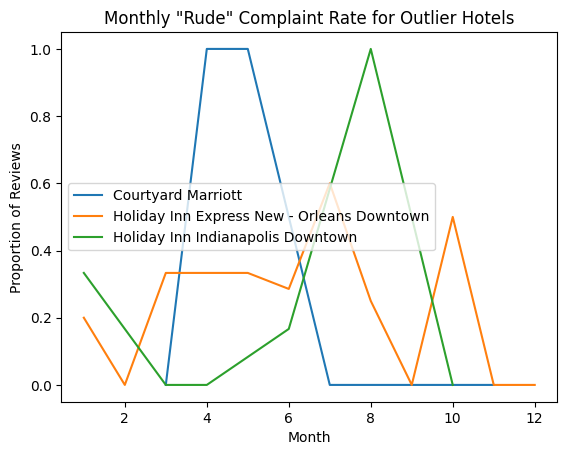

In [14]:
top_hotels = [
    "RZ1gi_Xa93bbx1y1tWIxMQ",  # Courtyard Marriott
    "3-69Zp0UWQafow9ilWDjvA",  # Holiday Inn Express New - Orleans Downtown
    "5-ZJE7qEtgGzypWNs9ausA"   # Holiday Inn Indianapolis Downtown
]

for hotel_id in top_hotels:
    hotel_df = df[df['business_id'] == hotel_id]
    monthly_hotel_rude = hotel_df.groupby('review_month')['has_rude'].mean()
    plt.plot(monthly_hotel_rude, label=hotel_df['name'].iloc[0])

plt.title('Monthly "Rude" Complaint Rate for Outlier Hotels')
plt.xlabel('Month')
plt.ylabel('Proportion of Reviews')
plt.legend()
plt.show()


## Insight 3

National brand reputation does not guarantee fairness or positive guest experience. For example, Hyatt in Tampa consistently outperforms its city average by +0.63 stars, with guest feedback praising effective problem resolution. In contrast, Sheraton in Philadelphia underperforms even a low city baseline, with guests describing the experience as merely adequate. This highlights the importance of focusing on local management and staff practices—both to raise struggling locations and learn from outliers who succeed despite the odds.

In [15]:
df['chain'] = df.apply(get_chain, axis=1)
city_means = df.groupby('city')['stars_review'].mean()
chain_city_means = df.groupby(['city','chain'])['stars_review'].mean().unstack()
rating_diff = chain_city_means.subtract(city_means, axis=0)
print(rating_diff.round(2))

chain         Hilton  Hyatt  Marriott  Other  Sheraton  Westin
city                                                          
Indianapolis   -0.02   0.03      0.27  -0.39     -0.52   -0.08
Nashville      -0.01   0.42      0.15  -0.29     -0.22   -0.01
New Orleans    -0.20   0.13      0.20  -0.28      0.04   -0.01
Philadelphia    0.01   0.56      0.15  -0.03     -0.52    0.20
Reno           -0.15   0.58     -0.36  -0.09       NaN     NaN
Tampa          -0.24   0.63      0.44  -0.23     -0.33   -0.40


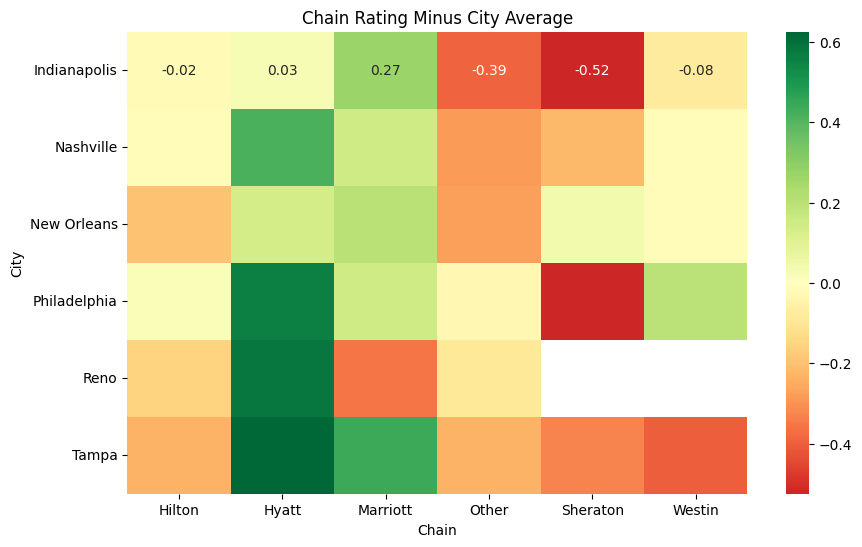

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(rating_diff, annot=True, center=0, cmap='RdYlGn', fmt=".2f")
plt.title('Chain Rating Minus City Average')
plt.ylabel('City')
plt.xlabel('Chain')
plt.show()

In [17]:
# Overperformer
ex_hi = df[(df['chain'] == 'Hyatt') & (df['city'] == 'Tampa')].sample(2)
print(ex_hi[['stars_review', 'text']])

# Underperformer
ex_lo = df[(df['chain'] == 'Sheraton') & (df['city'] == 'Philadelphia')].sample(2)
print(ex_lo[['stars_review', 'text']])


       stars_review                                               text
15048           5.0  i'm giving a 5 because i had a problem with my...
15614           1.0  had a real bad experience booking a reservatio...
      stars_review                                               text
3554           3.0  another tired airport hotel that's fine for a ...
4702           3.0  the sheraton is a very nice hotel. the service...


## Insight 4
Most mentions of gender, age, race, or status in the reviews are neutral. Of the small percentages (2-3% for gender/age, 0.3-0.5% for race/status), however, overlap with complaints about rudeness or about refusal or access issues. In this kind of sized dataset, we may be talking about dozens or up to hundreds of reviews stating how a guest's identity may have colored his negative experience. Sampled reviews confirm that these usually consist of feelings of unrespect, unsafe feeling, or denial of reasonable accommodation-reflecting systemic bias or discrimination. Although extremely few, such cases are very important for audits on fairness in hospitality, and should therefore draw extra attention from hotel management and regulators.

In [19]:
gender_terms = r'woman|female|girl|lady|man|male|boy|gentleman'
df['has_gender_term'] = df['text'].str.contains(gender_terms, case=False, na=False)
race_terms = r'black|white|asian|latino|hispanic|indian|african american|arab'
df['has_race_term'] = df['text'].str.contains(race_terms, case=False, na=False)
age_terms = r'old|elderly|young|teen|senior|child|youth|kids'
df['has_age_term'] = df['text'].str.contains(age_terms, case=False, na=False)
age_terms = r'old|elderly|young|teen|senior|child|youth|kids'
df['has_age_term'] = df['text'].str.contains(age_terms, case=False, na=False)
status_terms = r'poor|rich|homeless|vip|immigrant|disabled|handicap'
df['has_status_term'] = df['text'].str.contains(status_terms, case=False, na=False)


In [20]:
for col in ['has_gender_term', 'has_race_term', 'has_age_term', 'has_status_term']:
    print(f"{col}: {df[col].mean():.2%} of reviews")


has_gender_term: 28.41% of reviews
has_race_term: 4.95% of reviews
has_age_term: 28.13% of reviews
has_status_term: 5.00% of reviews


In [21]:
complaint_cols = ['has_rude', 'has_unfair', 'has_refused', 'has_access']
for bias_col in ['has_gender_term', 'has_race_term', 'has_age_term', 'has_status_term']:
    for complaint in complaint_cols:
        co_rate = (df[bias_col] & df[complaint]).mean()
        if co_rate > 0:
            print(f"{bias_col} & {complaint}: {co_rate:.2%} of all reviews")


has_gender_term & has_rude: 2.64% of all reviews
has_gender_term & has_unfair: 0.03% of all reviews
has_gender_term & has_refused: 0.49% of all reviews
has_gender_term & has_access: 1.63% of all reviews
has_race_term & has_rude: 0.30% of all reviews
has_race_term & has_refused: 0.05% of all reviews
has_race_term & has_access: 0.32% of all reviews
has_age_term & has_rude: 2.17% of all reviews
has_age_term & has_unfair: 0.02% of all reviews
has_age_term & has_refused: 0.45% of all reviews
has_age_term & has_access: 1.65% of all reviews
has_status_term & has_rude: 0.48% of all reviews
has_status_term & has_unfair: 0.01% of all reviews
has_status_term & has_refused: 0.08% of all reviews
has_status_term & has_access: 0.45% of all reviews


In [22]:
bias_mask = df['has_gender_term'] & df['has_rude']
sample_bias = df[bias_mask]
print(sample_bias[['stars_review', 'text']].sample(min(3, len(sample_bias))))


       stars_review                                               text
14417           1.0  awful experience, do not choose this hotel!\n\...
16381           1.0  stay far, far away. nice location and layout b...
20756           1.0  we were given a room which faced the train tra...


### How might you automate bias detection on this kind of data?
We can automate bias detection by scanning reviews for keywords related to unfairness (like “rude” or “refused”) and also for mentions of gender, race, age, or status (using proxies, since we don’t have direct sensitive data). By looking for patterns—such as when identity-related terms appear together with complaints—we can flag possible cases of bias. Simple tools like keyword search, co-occurrence tracking, and basic sentiment analysis can run automatically on large datasets, quickly surfacing reviews and locations that may need further human review.

### Any creative ideas, ethical considerations, or reflections.
Since the Yelp dataset doesn’t include sensitive personal details, we used proxy values—looking for reviews where guests mention things like being a woman, senior, or a person of color—especially when combined with negative experiences. This lets us spot possible bias while respecting privacy.

It’s important to remember that not every mention of these words means discrimination, so results should be reviewed in context.

Ethically, automated tools should always be paired with human judgment to interpret meaning carefully and respond appropriately. Even without sensitive data, using proxies and patterns helps keep fairness on the radar, ensuring that problems aren’t missed just because direct evidence isn’t available.